In [65]:
import pandas as pd
import time

## Google Image Scraper

In [ ]:
from playwright.async_api import async_playwright
import asyncio
import random

async def scrape_google_image_thumbnails(search_term, timeout_minutes=10):
    thumbnails = []
    
    async with async_playwright() as p:
        browser = await p.chromium.launch(
            headless=False,  # Try non-headless first
            args=[
                '--disable-blink-features=AutomationControlled',
                '--disable-web-security',
                '--disable-features=VizDisplayCompositor'
            ]
        )
        
        context = await browser.new_context(
            user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
            viewport={'width': 1920, 'height': 1080}
        )
        
        page = await context.new_page()
        
        query = search_term.replace(" ", "+")
        search_url = f"https://www.google.com/search?tbm=isch&q={query}"
        
        try:
            await page.goto(search_url, wait_until="networkidle", timeout=30000)
            
            # Wait for initial images to load
            await page.wait_for_selector("img.YQ4gaf", timeout=10000)
            
            start_time = asyncio.get_event_loop().time()
            
            while (asyncio.get_event_loop().time() - start_time) < (timeout_minutes * 60):
                # Scroll to bottom of page
                await page.evaluate("window.scrollTo(0, document.body.scrollHeight)")
                
                # Wait for content to load
                await asyncio.sleep(random.uniform(1.0, 2.5))
                
                # Check for "Show more results" button and click it
                try:
                    show_more_selectors = [
                        "input[value='Show more results']",
                        ".mye4qd",
                        "[jsname='N760b']",
                        ".YstHxe input",
                        ".LZ4I",
                        ".r0zKGf"
                    ]
                    
                    clicked = False
                    for selector in show_more_selectors:
                        try:
                            button = await page.query_selector(selector)
                            if button and await button.is_visible():
                                await button.click()
                                await asyncio.sleep(3)
                                clicked = True
                                print("Clicked 'Show more results' button")
                                break
                        except:
                            continue
                    
                    if clicked:
                        # After clicking, wait for new content
                        await asyncio.sleep(2)
                        continue
                        
                except Exception as e:
                    print(f"Error checking for show more button: {e}")
                
                # Alternative: Look for "See more images" link
                try:
                    see_more = await page.query_selector("a[jsname='N760b']")
                    if see_more:
                        await see_more.click()
                        await asyncio.sleep(3)
                        print("Clicked 'See more images' link")
                        continue
                except:
                    pass
                
                # Check if we've reached the end (no more content loading)
                current_height = await page.evaluate("document.body.scrollHeight")
                await asyncio.sleep(1)
                await page.evaluate("window.scrollTo(0, document.body.scrollHeight)")
                await asyncio.sleep(2)
                new_height = await page.evaluate("document.body.scrollHeight")
                
                if current_height == new_height:
                    print("Reached end of page - no more content loading")
                    break
                    
                print(f"Page height: {current_height} -> {new_height}")
            
            # Final scrape of all images
            print("Final scrape of all images...")
            await page.wait_for_load_state('networkidle', timeout=10000)
            elements = await page.query_selector_all("img.YQ4gaf")
            
            print(f"Found {len(elements)} total img.YQ4gaf elements")
            
            for i, el in enumerate(elements):
                try:
                    src = await el.get_attribute("src")
                    data_src = await el.get_attribute("data-src")
                    
                    # Try src first, then data-src
                    image_url = src or data_src
                    
                    if image_url:
                        # Accept both base64 and regular URLs
                        if (image_url.startswith("data:image/jpeg") or 
                            image_url.startswith("https://encrypted-tbn0.gstatic.com/images")):
                            thumbnails.append(image_url)
                            
                except Exception as e:
                    print(f"Error processing element {i}: {e}")
                    continue
        
        except Exception as e:
            print(f"Error during scraping: {e}")
        
        finally:
            await browser.close()
    
    return thumbnails  # Return all images including duplicates

In [117]:

# Usage example
async def main():
    search_term = "Trump muscular"
    thumbnails = await scrape_google_image_thumbnails(search_term, timeout_minutes=15)
    print(f"Found {len(thumbnails)} total images")
    return thumbnails

# Run the scraper
thumbnails = await main()

Page height: 7332 -> 10269
Reached end of page - no more content loading
Final scrape of all images...
Found 602 total img.YQ4gaf elements
Found 286 total images


In [118]:
len(thumbnails)

286

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTb6k1C6AwVo961Z-_zbwPTGbvtEzFLTtlbyw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGv7xPU8qDiTC1BaGBm4spr2wdqOWDLNQs-w&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6ZXf-g5K1lG6V21W5hhPGvNB7gdxAe3cp7w&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyy3UTHYi-KWXf9ZXxcwETvnSabvs33Usnzw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqn4NucvHdvdHt2gduxMOM0MKZ_nj2a-rhMQ&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScJ8Vb6m2JDmNrIbsJVgUz9doISIdcxX1Ijg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUffpf4CF1QpaODyUYrTn1wlPmmegnC2u0bA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnu4GsSLDol-PeDeMlXgks4nX4rAeI_scGkQ&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQx22jA_e0pw6fJx0Fp51DMV
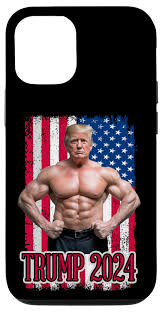
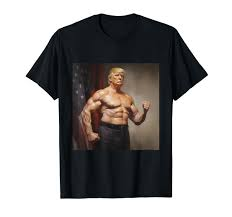
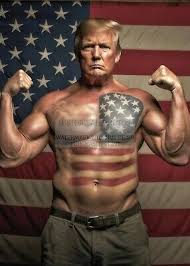
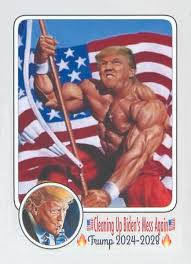
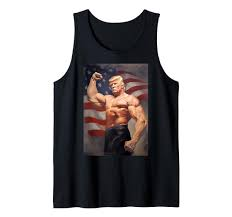
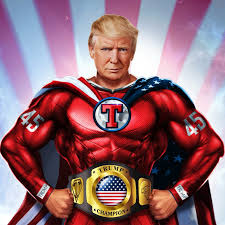
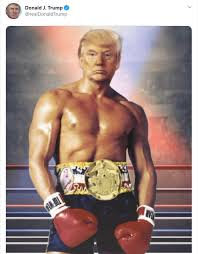
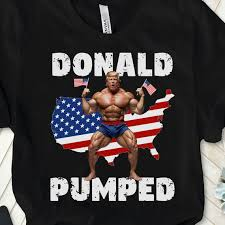
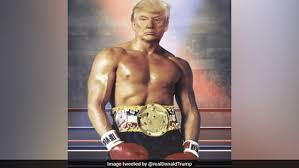
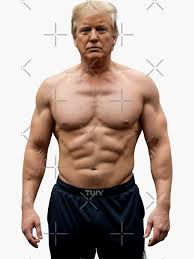
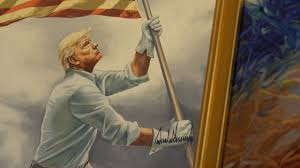
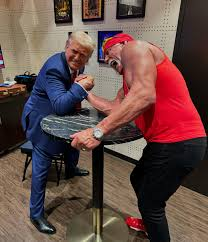
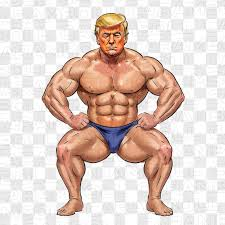
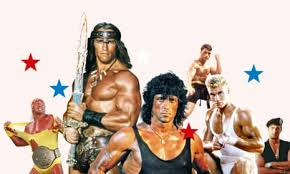
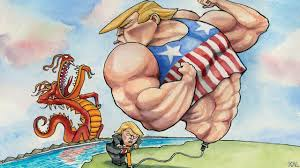
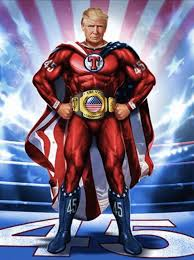
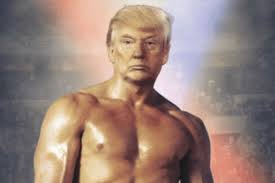
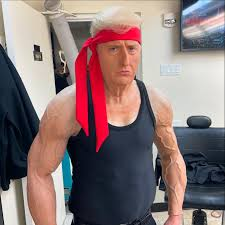
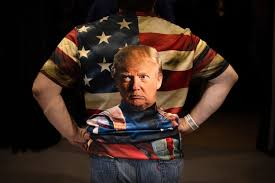
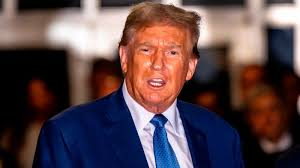
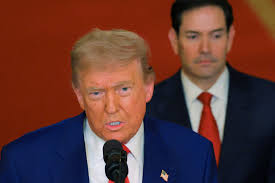
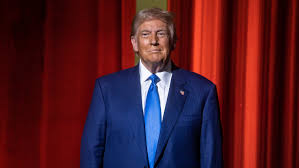
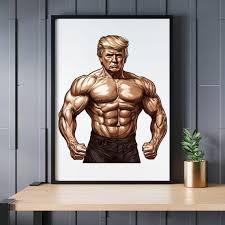
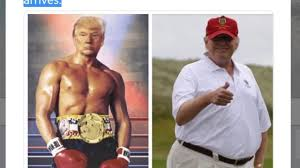
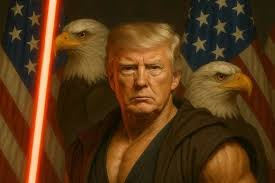
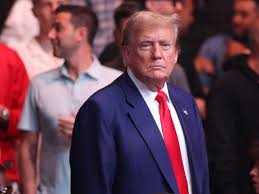
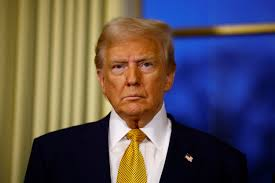
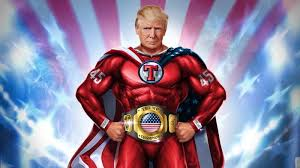
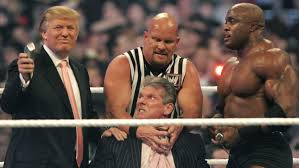

In [119]:
thumbnails

In [80]:
import numpy as np
from dotenv import load_dotenv
import os
from serpapi import GoogleSearch
load_dotenv() 
header_auth_key = os.getenv("NVDIA_API_KEY")

In [81]:
header_auth = f"Bearer {header_auth_key}"
invoke_url = "https://ai.api.nvidia.com/v1/cv/hive/deepfake-image-detection"

In [ ]:
import requests
import base64
import time
import os
from uuid import uuid4

def upload_asset(path, desc):
    assets_url = "https://api.nvcf.nvidia.com/v2/nvcf/assets"
    headers = {
        "Content-Type": "application/json",
        "Authorization": header_auth,
        "accept": "application/json",
    }
    payload = {
        "contentType": "image/png",
        "description": desc
    }
    response = requests.post(assets_url, headers=headers, json=payload, timeout=30)
    response.raise_for_status()
    upload_url = response.json()["uploadUrl"]
    asset_id = response.json()["assetId"]

    headers = {
        "Content-Type": "image/png",
        "x-amz-meta-nvcf-asset-description": desc,
    }
    with open(path, "rb") as img_file:
        requests.put(upload_url, data=img_file, headers=headers, timeout=300)

    return asset_id

def get_deepfake_score(image_src: str, delay_sec=5):
    """
    Unified handler for both base64 and HTTP image URLs.
    Downloads the image temporarily and either base64 encodes or uploads it.
    """
    time.sleep(delay_sec)
    temp_path = f"temp_{uuid4().hex}.png"


    deepfake_scores = []

    try:
        # --- CASE 1: base64 image ---
        if image_src.startswith("data:image"):
            img_b64 = image_src.split(",", 1)[1]
            img_bytes = base64.b64decode(img_b64)
            with open(temp_path, "wb") as f:
                f.write(img_bytes)

        # --- CASE 2: HTTP image URL ---
        else:
            resp = requests.get(image_src, timeout=15)
            if resp.status_code != 200:
                raise Exception(f"HTTP request failed with status {resp.status_code}")
            img_bytes = resp.content
            with open(temp_path, "wb") as f:
                f.write(img_bytes)

        # Decide whether to upload or inline the image
        if os.path.getsize(temp_path) < 180_000:  # <180KB: encode inline
            encoded = base64.b64encode(open(temp_path, "rb").read()).decode()
            payload = {"input": [f"data:image/png;base64,{encoded}"]}
            headers = {
                "Content-Type": "application/json",
                "Authorization": header_auth,
                "Accept": "application/json",
            }
        else:  # larger file: upload to asset server
            asset_id = upload_asset(temp_path, "Uploaded by get_deepfake_score")
            payload = {"input": [f"data:image/png;asset_id,{asset_id}"]}
            headers = {
                "Content-Type": "application/json",
                "Authorization": header_auth,
                "NVCF-INPUT-ASSET-REFERENCES": asset_id,
            }

        # Send request
        resp = requests.post(invoke_url, headers=headers, json=payload)

        if resp.status_code == 200:
            data = resp.json()
            score = data["data"][0]["bounding_boxes"][0]["is_deepfake"]
            deepfake_scores.append(score)
        else:
            print(f"❌ {image_src} → Error {resp.status_code}")
            deepfake_scores.append(None)

    except Exception as e:
        print(f"⚠️ Failed to process {image_src}: {e}")
        print()
        deepfake_scores.append(None)

    finally:
        if os.path.exists(temp_path):
            os.remove(temp_path)


⚠️ Failed to process : list index out of range
⚠️ Failed to process : list index out of range
⚠️ Failed to process : list index out of range

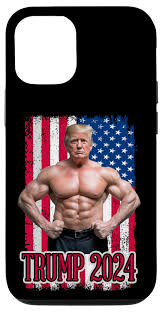
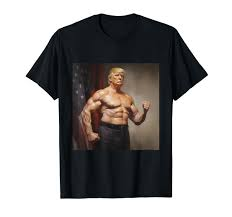
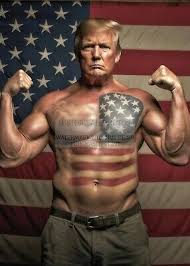

In [145]:
results = []
for url in thumbnails[:5]:
    score = get_deepfake_score(url)
    results.append(score)


In [104]:
muscular_trump_df = pd.DataFrame({
    "thumbnail": thumbnails,
    "deepfake_score": deepfake_scores
})

# Another Google Image Scraper

In [129]:
from playwright.async_api import async_playwright
import asyncio
import random

async def scrape_google_images(search_term, timeout_minutes=1):
    thumbnails = []

    async with async_playwright() as p:
        browser = await p.chromium.launch(
            headless=False,
            args=[
                '--disable-blink-features=AutomationControlled',
                '--disable-web-security',
                '--disable-features=VizDisplayCompositor'
            ]
        )
        context = await browser.new_context(
            user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
            viewport={'width': 1920, 'height': 1080}
        )
        page = await context.new_page()

        query = search_term.replace(" ", "+")
        search_url = f"https://www.google.com/search?tbm=isch&q={query}"

        try:
            await page.goto(search_url, wait_until="networkidle", timeout=30000)
            await page.wait_for_selector("g-img img", timeout=10000)

            print("Page loaded. Scrolling...")

            start_time = asyncio.get_event_loop().time()

            while (asyncio.get_event_loop().time() - start_time) < (timeout_minutes * 60):
                prev_height = await page.evaluate("document.body.scrollHeight")
                await page.evaluate("window.scrollTo(0, document.body.scrollHeight)")
                await asyncio.sleep(random.uniform(1.0, 2.5))
                new_height = await page.evaluate("document.body.scrollHeight")

                # Try clicking "Show more results" if available
                try:
                    button = await page.query_selector(".mye4qd")
                    if button and await button.is_visible():
                        await button.click()
                        print("Clicked 'Show more results'")
                        await asyncio.sleep(2)
                except:
                    pass

                if new_height == prev_height:
                    print("Reached end of page")
                    break

            print("Scrolling complete. Extracting images...")

            # Get all image wrappers
            image_wrappers = await page.query_selector_all(
                "#rso > div > div > div.wH6SXe.u32vCb > div > div > div"
            )

            print(f"Found {len(image_wrappers)} image wrapper elements")

            for i, wrapper in enumerate(image_wrappers):
                try:
                    img = await wrapper.query_selector("g-img img")
                    if img:
                        src = await img.get_attribute("src") or await img.get_attribute("data-src")
                        if src and (src.startswith("http") or src.startswith("data:image/")):
                            thumbnails.append(src)
                except Exception as e:
                    print(f"Error processing image {i}: {e}")
                    continue

        except Exception as e:
            print(f"Error during scraping: {e}")

        finally:
            await browser.close()

    thumbnails = list(set(thumbnails))  # Remove duplicates
    print(f"Collected {len(thumbnails)} image URLs.")
    return thumbnails

Page loaded. Scrolling...
Reached end of page
Scrolling complete. Extracting images...
Found 315 image wrapper elements
Collected 302 image URLs.
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT26MQSDtPHh8uYX1Hw2pqlCV2WObhpaEDCCw&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmuGOp9y5sli4uDjJnZ5RRTAk9U4NloQYwaw&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2-Qdx1yyCo7BIRURtb-GY5N5nSbVzQwSr9A&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRW9xsuLmMkgzZJRDK3ZUPXAD2pd0g7vS8bTQ&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6cgFcH4EK2Jnaebzif_JX75HwIRpW3IRL7A&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThlIttin5ca9th2IaEs_uyZld1_9KA2SUHdA&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSiazby0W10M3OVcUKJlABTG2XhsRavZxU7ww&s

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKP6dpXjKH39__3q6_gnkz4ShEcixHgRUx9Q&s

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgIbZ00sOyTSSvYeY8pbwDMwNxKNgSWWzP9A&s
https://encrypt
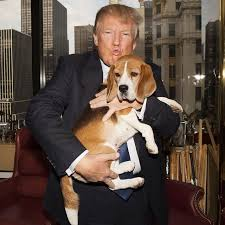
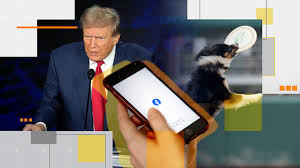
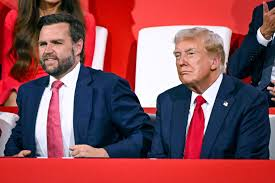
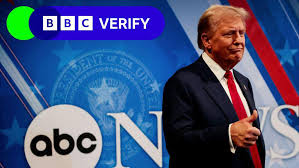
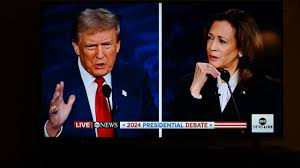
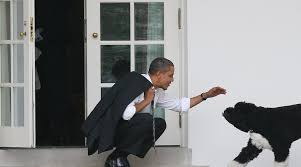
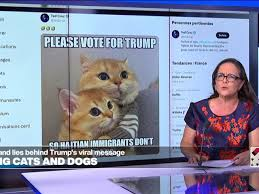
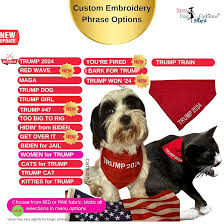
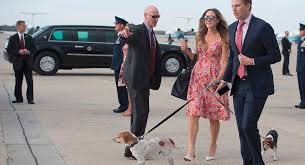
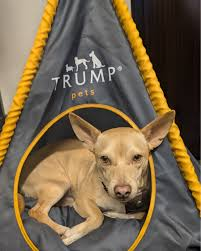
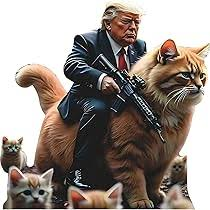
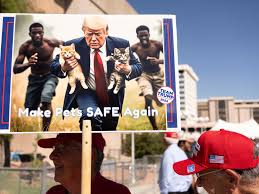
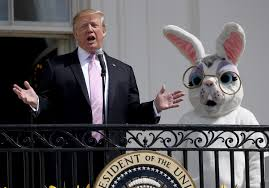
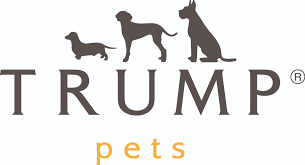
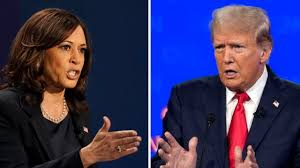
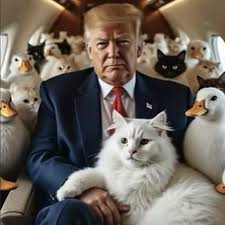
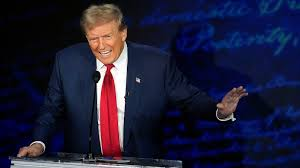
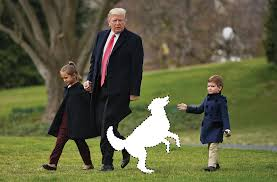
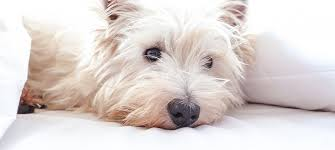
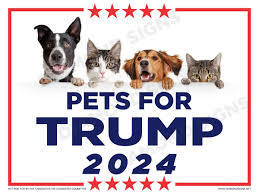
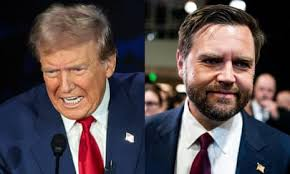
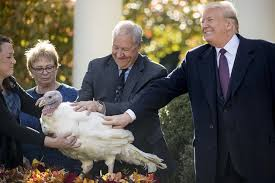
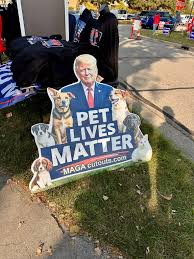
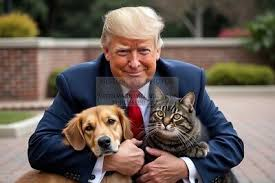
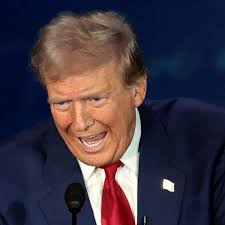
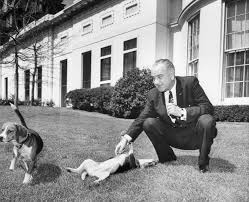
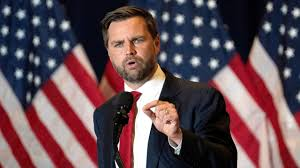

In [155]:
if __name__ == "__main__":
    search_term = "Trump Pets"
    results = asyncio.run(scrape_google_images(search_term))
    for url in results:
        print(url)


# Save all images

In [153]:
def save_image(image_src: str, save_dir="downloaded_images") -> str | None:
    """
    Downloads and saves a base64 or URL image to the given folder.
    Returns the saved file path or None if failed.
    """
    os.makedirs(save_dir, exist_ok=True)
    file_path = os.path.join(save_dir, f"{uuid4().hex}.png")

    try:
        # CASE 1: base64 image
        if image_src.startswith("data:image"):
            img_b64 = image_src.split(",", 1)[1]
            img_bytes = base64.b64decode(img_b64)
        
        # CASE 2: image URL
        else:
            resp = requests.get(image_src, timeout=15)
            if resp.status_code != 200:
                raise Exception(f"Request failed: {resp.status_code}")
            img_bytes = resp.content

        # Write to file
        with open(file_path, "wb") as f:
            f.write(img_bytes)
        return file_path

    except Exception as e:
        print(f"⚠️ Failed to save image: {e}")
        return None


In [156]:
saved_files = []

for src in results:
    path = save_image(src)
    if path:
        saved_files.append(path)

print(f"✅ Saved {len(saved_files)} images to folder.")


✅ Saved 302 images to folder.


1. trump muscular
2. biden muscular
3. trump pets: 40/302 ; 